In [51]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [52]:
df = pd.read_csv(r"C:\Users\HP\Downloads\datafile.csv")

In [53]:
!jupyter nbextension enable --py widgetsnbextension --sys-prefix
!jupyter serverextension enable voila --sys-prefix

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok
Enabling: voila
- Writing config: C:\Users\HP\anaconda3\envs\geo_env\etc\jupyter
    - Validating...
      voila 0.2.16 ok


In [54]:
import ipywidgets as widgets
from IPython.display import display, clear_output

In [55]:
grand = widgets.ToggleButtons(
            options=['grandson', 'granddaughter']
        )

In [56]:
df.head()

,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price
0,Karnataka,Bangalore,Ramanagara,Beans,Beans (Whole),28/09/2021,2000,2800,2500
1,Karnataka,Bangalore,Ramanagara,Beetroot,Beetroot,28/09/2021,1600,2000,1800
2,Karnataka,Bangalore,Ramanagara,Bhindi(Ladies Finger),Bhindi,28/09/2021,1200,1600,1400
3,Karnataka,Bangalore,Ramanagara,Bitter gourd,Bitter Gourd,28/09/2021,1200,1600,1400
4,Karnataka,Bangalore,Ramanagara,Brinjal,Brinjal,28/09/2021,600,1000,800


In [57]:
shp_gdf = gpd.read_file(r'C:\Users\HP\Downloads\IND_adm\IND_adm3.shp')
shp_gdf.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,ID_3,NAME_3,TYPE_3,ENGTYPE_3,NL_NAME_3,VARNAME_3,geometry
0,105,IND,India,1,Andaman and Nicobar,1,Andaman Islands,1,n.a. ( 2178),Taluk,Taluk,None,None,"MULTIPOLYGON (((93.64841 14.93487, 93.64917 14..."
1,105,IND,India,1,Andaman and Nicobar,2,Nicobar Islands,2,n.a. ( 2304),Taluk,Taluk,None,None,"MULTIPOLYGON (((92.78778 9.24417, 92.78889 9.2..."
2,105,IND,India,2,Andhra Pradesh,3,Anantapur,3,Anantapur,Taluk,Taluk,None,None,"POLYGON ((77.35452 14.52155, 77.34958 14.52136..."
3,105,IND,India,2,Andhra Pradesh,3,Anantapur,4,Dharmavaram,Taluk,Taluk,None,None,"POLYGON ((77.35341 14.27068, 77.35244 14.28055..."
4,105,IND,India,2,Andhra Pradesh,3,Anantapur,5,Gooty,Taluk,Taluk,None,None,"POLYGON ((77.77217 15.10376, 77.77106 15.09759..."


In [58]:
shp_gdf.shape

(2299, 14)

In [59]:
new_map = shp_gdf[['NAME_3','geometry']]
new_map.head()

,NAME_3,geometry
0,n.a. ( 2178),"MULTIPOLYGON (((93.64841 14.93487, 93.64917 14..."
1,n.a. ( 2304),"MULTIPOLYGON (((92.78778 9.24417, 92.78889 9.2..."
2,Anantapur,"POLYGON ((77.35452 14.52155, 77.34958 14.52136..."
3,Dharmavaram,"POLYGON ((77.35341 14.27068, 77.35244 14.28055..."
4,Gooty,"POLYGON ((77.77217 15.10376, 77.77106 15.09759..."


In [60]:
merged = new_map.set_index("NAME_3").join(df.set_index("district"))
merged.head(20)

,geometry,state,market,commodity,variety,arrival_date,min_price,max_price,modal_price
Abohar,"POLYGON ((74.27903 29.95509, 74.26031 29.95567...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Abu Road,"POLYGON ((72.60413 24.46911, 72.61095 24.48314...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Achalpur,"POLYGON ((77.45644 21.07682, 77.44541 21.08339...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Achampet,"POLYGON ((78.91335 16.10884, 78.91048 16.10522...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Addanki,"POLYGON ((79.86678 15.65616, 79.87365 15.66681...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Addatigala,"POLYGON ((82.32346 17.50615, 82.31395 17.50048...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Adilabad,"POLYGON ((78.31020 19.91274, 78.31951 19.91547...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Adoni,"POLYGON ((77.02889 15.59826, 77.02840 15.60685...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Adur,"POLYGON ((76.64102 9.14179, 76.65238 9.14195, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afzalpur,"POLYGON ((76.66064 17.35477, 76.66063 17.34688...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
merged.isna().sum()

geometry           0
state           2293
market          2293
commodity       2293
variety         2293
arrival_date    2293
min_price       2293
max_price       2293
modal_price     2293
dtype: int64

In [62]:
m1 = merged.dropna()

In [63]:
import folium

In [64]:
m1.head()

,geometry,state,market,commodity,variety,arrival_date,min_price,max_price,modal_price
Baghpat,"POLYGON ((77.13177 29.09465, 77.12438 29.10149...",Uttar Pradesh,Baraut,Apple,Kasmir/Shimla - II,28/09/2021,3300.0,3500.0,3400.0
Baghpat,"POLYGON ((77.13177 29.09465, 77.12438 29.10149...",Uttar Pradesh,Baraut,Banana - Green,Banana - Green,28/09/2021,1020.0,1040.0,1030.0
Baghpat,"POLYGON ((77.13177 29.09465, 77.12438 29.10149...",Uttar Pradesh,Baraut,Onion,Onion,28/09/2021,1900.0,2000.0,1950.0
Baghpat,"POLYGON ((77.13177 29.09465, 77.12438 29.10149...",Uttar Pradesh,Baraut,Potato,Chips,28/09/2021,700.0,800.0,750.0
Baghpat,"POLYGON ((77.13177 29.09465, 77.12438 29.10149...",Uttar Pradesh,Baraut,Pumpkin,Pumpkin,28/09/2021,600.0,700.0,650.0


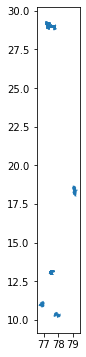

In [65]:
m1.plot(figsize=(6,6))
plt.show()

In [66]:
m1.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [67]:
m1 = m1.to_crs(epsg=2263)

# Access the centroid attribute of each polygon
m1['centroid'] = m1.centroid

In [68]:
m1 = m1.to_crs(epsg=4326)

# Centroid column
m1['centroid'] = m1['centroid'].to_crs(epsg=4326)

m1.head()

,geometry,state,market,commodity,variety,arrival_date,min_price,max_price,modal_price,centroid
Baghpat,"POLYGON ((77.13177 29.09465, 77.12438 29.10149...",Uttar Pradesh,Baraut,Apple,Kasmir/Shimla - II,28/09/2021,3300.0,3500.0,3400.0,POINT (77.30264 29.05975)
Baghpat,"POLYGON ((77.13177 29.09465, 77.12438 29.10149...",Uttar Pradesh,Baraut,Banana - Green,Banana - Green,28/09/2021,1020.0,1040.0,1030.0,POINT (77.30264 29.05975)
Baghpat,"POLYGON ((77.13177 29.09465, 77.12438 29.10149...",Uttar Pradesh,Baraut,Onion,Onion,28/09/2021,1900.0,2000.0,1950.0,POINT (77.30264 29.05975)
Baghpat,"POLYGON ((77.13177 29.09465, 77.12438 29.10149...",Uttar Pradesh,Baraut,Potato,Chips,28/09/2021,700.0,800.0,750.0,POINT (77.30264 29.05975)
Baghpat,"POLYGON ((77.13177 29.09465, 77.12438 29.10149...",Uttar Pradesh,Baraut,Pumpkin,Pumpkin,28/09/2021,600.0,700.0,650.0,POINT (77.30264 29.05975)


In [69]:
grd = m1.groupby('market').apply(lambda x : x.sort_values(by = 'modal_price', ascending = False).head(1).reset_index(drop = True))
print(grd)

                                                        geometry  \
market                                                             
Baraut      0  POLYGON ((77.13177 29.09465, 77.12438 29.10149...   
Gopalpatti  0  POLYGON ((78.16162 10.36103, 78.16360 10.33837...   
Pothgal     0  POLYGON ((79.25052 17.99603, 79.25137 17.97636...   
Pudupalayam 0  POLYGON ((76.65279 10.91996, 76.64916 10.92415...   
Ramanagara  0  POLYGON ((77.42146 13.15547, 77.43128 13.15646...   
Sardhana    0  POLYGON ((77.85768 28.86773, 77.85382 28.86351...   

                       state       market            commodity  \
market                                                           
Baraut      0  Uttar Pradesh       Baraut                Apple   
Gopalpatti  0     Tamil Nadu   Gopalpatti              Coconut   
Pothgal     0      Telangana      Pothgal  Paddy(Dhan)(Common)   
Pudupalayam 0     Tamil Nadu  Pudupalayam              Coconut   
Ramanagara  0      Karnataka   Ramanagara         Green Chi

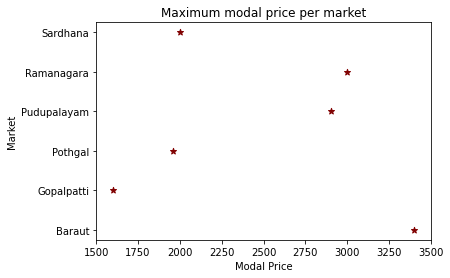

In [70]:
plt.scatter(grd['modal_price'],grd['market'], color='maroon',s=40,marker='*')
plt.xlabel("Modal Price")
plt.ylabel("Market")
plt.title("Maximum modal price per market")
plt.xlim([1500,3500])
plt.show()

In [71]:
india = folium.Map(location = [20.5937,78.9629],zoom_start=4.5)

## Plotting the Maximum modal price with more detailing on India map 

In [72]:
for _,r in grd.iterrows():
    lat = r['centroid'].y
    lon = r['centroid'].x
    folium.Marker(location=[lat, lon],
                  popup='<b>State:</b>{} <br> <b>Market:</b>{} <br> <b>Commodity:</b>{} <br> <b>Variety:</b>{} <br> <b>Date:</b>{} <br><b>Minimum price:</b>{} <br> <b>Maximum Price:</b>{} <br> <b>Modal price:</b>{}'.format(r['state'], r['market'], r['commodity'], r['variety'], r['arrival_date'], r['min_price'], r['max_price'], r['modal_price'])).add_to(india)

india

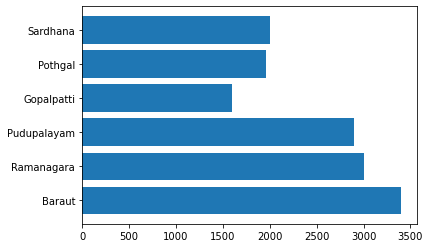

In [73]:
plt.barh(m1['market'],m1['modal_price'])
plt.show()

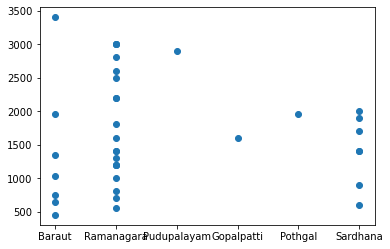

In [74]:
plt.scatter(m1['market'],m1['modal_price'])
plt.show()

In [75]:
import plotly.express as px
dataf = px.data.gapminder().query("year == 2007")
fig = px.treemap(df, path=[px.Constant("world"), 'continent', 'country'], values='pop',
                  color='lifeExp', hover_data=['iso_alpha'],
                  color_continuous_scale='RdBu',
                  color_continuous_midpoint=np.average(df['lifeExp'], weights=df['pop']))
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

ModuleNotFoundError: No module named 'plotly'